# 电液伺服阀测试
1. 初始化环境+载入模型

In [1]:
from OMPython import OMCSessionZMQ
from OMPython import ModelicaSystem
import matplotlib.pyplot as plt
import numpy as np
work_path = OMCSessionZMQ().sendExpression("cd()")
mod = ModelicaSystem(work_path+"/HSV_test.mo","HSV_test",[work_path+"/../../CL4CSM/package.mo","Modelica"])

2.定义模型参数（供油压力MPa、回油压力MPa、额定电流mA、额定流量L/min）

In [6]:
P_P, P_T, I_R, Q_R, I_bias = 8e6, 0, 0.155+0.022*2, 3.6, 0.022
mod.setParameters( ["constP_Boundary2.P="+str(P_P), "constP_Boundary.P="+str(P_T)] )
mod.setParameters( ["hsv.I_R="+str(I_R), "hsv.P_R="+str((P_P+P_T)/2), "hsv.W_R="+str(Q_R/60*0.78), "hsv.I_bias="+str(I_bias)] )
mod.setSimulationOptions(["stopTime=1"])
print(mod.getParameters( ["hsv.I_R", "hsv.P_R", "hsv.W_R", "hsv.I_bias"] ))
print(mod.getSimulationOptions())
# mod.getParameters()

['0.199', '4000000.0', '0.04680000000000001', '0.022']
{'startTime': '0', 'stopTime': '1', 'stepSize': '0.002', 'tolerance': '1e-06', 'solver': 'dassl'}


3.载入试验数据，绘制流量特性图

Total number of points = 66


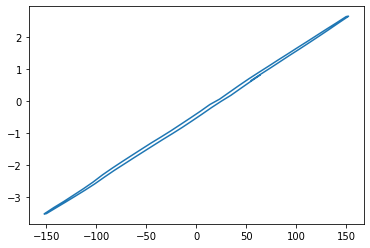

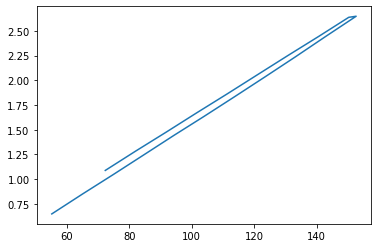

In [11]:
data_origin = np.genfromtxt('data.csv', delimiter=',', skip_header = 1)
data = data_origin[::500,:]
pt_num = np.size(data,0)
print( "Total number of points = " + str(pt_num))
plt.figure(1)
fig1=plt.plot(data[:,0], data[:,1])
plt.figure(2)
fig2=plt.plot(data_origin[1:10000:500,0], data_origin[1:10000:500,1])

4.运行模型并将结果

In [8]:
rcd = np.zeros((pt_num, 1))

for i in range( pt_num ) :
    
    mod.setParameters( ["I_in="+str(data[i,0]/1000)] )
    mod.simulate()
    res = mod.getSolutions(["hsv.A.m_dot"])
    rcd[i,0] = res[0,-1]

5.绘图

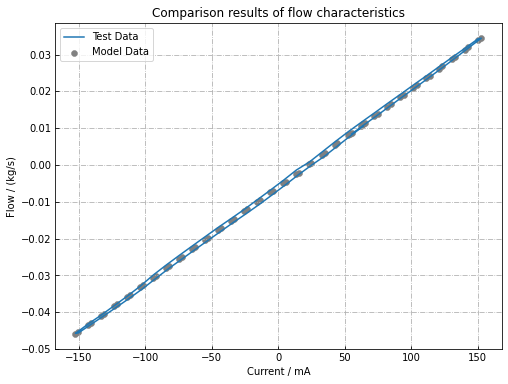

In [19]:
plt.figure(figsize=(8,6))
for i in range( pt_num ) :
    plt.scatter(data[i,0],rcd[i,0] ,color="grey",linewidth=0.5)
plt.scatter(data[i,0],rcd[i,0] ,color="grey",label="Model Data",linewidth=0.5)
plt.plot(data[:,0], data[:,1]/60*0.78, label="Test Data")
plt.legend(loc='best',scatterpoints = 1)
plt.title('Comparison results of flow characteristics')
plt.xlabel('Current / mA')
plt.ylabel('Flow / (kg/s)')
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.grid(linestyle = '-.')
plt.savefig('./test2.tiff')
plt.show()

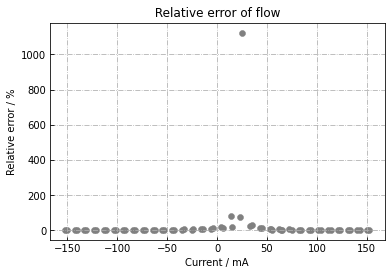

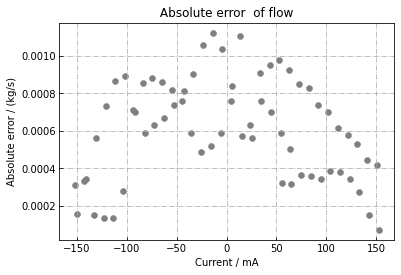

In [17]:
err_rel = np.zeros((pt_num, 1))
err_abs = np.zeros((pt_num, 1))
plt.figure(1)
for i in range( pt_num ) :
    err_rel[i] = abs(data[i,1]/60*0.78 - rcd[i,0]) / abs(data[i,1]/60*0.78) * 100
    plt.scatter(data[i,0],err_rel[i] ,color="grey",linewidth=0.5) 
plt.title(' Relative error of flow ')
plt.xlabel('Current / mA')
plt.ylabel('Relative error / %')
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.grid(linestyle = '-.')
plt.savefig('./Relative_error2.tiff')
plt.figure(2)
for i in range( pt_num ) :
    err_abs[i] = abs(data[i,1]/60*0.78 - rcd[i,0])
    plt.scatter(data[i,0],err_abs[i] ,color="grey",linewidth=0.5) 
plt.title(' Absolute error  of flow ')
plt.xlabel('Current / mA')
plt.ylabel('Absolute error / (kg/s)')
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.grid(linestyle = '-.')
plt.savefig('./Absolute_error2.tiff')